<a href="https://colab.research.google.com/github/Aqillaaprly/Rakamin_FinalProject_DS59/blob/Aqilla/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [8]:
# Load Data
df = pd.read_csv('/content/drive/MyDrive/rakamin/recruitment_efficiency_improved.csv')
print("Shape:", df.shape)
display(df.head())
print("\nInfo Data:")
df.info()
print("\nMissing Values:")
print(df.isnull().sum())

Shape: (5000, 8)


,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate
0,1,Engineering,Software Engineer,280,24,1400.38,Referral,0.98
1,2,Sales,Account Executive,262,7,2730.45,LinkedIn,0.84
2,3,Product,UX Designer,11,76,5286.12,LinkedIn,0.83
3,4,Engineering,DevOps Engineer,238,26,5255.78,Recruiter,0.49
4,5,HR,Talent Acquisition,275,37,4987.03,LinkedIn,0.79



Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   recruitment_id         5000 non-null   int64  
 1   department             5000 non-null   object 
 2   job_title              5000 non-null   object 
 3   num_applicants         5000 non-null   int64  
 4   time_to_hire_days      5000 non-null   int64  
 5   cost_per_hire          5000 non-null   float64
 6   source                 5000 non-null   object 
 7   offer_acceptance_rate  5000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 312.6+ KB

Missing Values:
recruitment_id           0
department               0
job_title                0
num_applicants           0
time_to_hire_days        0
cost_per_hire            0
source                   0
offer_acceptance_rate    0
dtype: int64


In [9]:
# descriptive statistics
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,recruitment_id,num_applicants,time_to_hire_days,cost_per_hire,offer_acceptance_rate
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,155.621000,47.191400,5214.826236,0.650832
std,1443.520003,84.164264,23.864934,2730.999185,0.202052
min,1.000000,10.000000,7.000000,507.160000,0.300000
25%,1250.750000,83.000000,26.000000,2820.597500,0.480000
50%,2500.500000,157.000000,47.000000,5218.290000,0.650000
75%,3750.250000,229.000000,67.000000,7611.412500,0.830000
max,5000.000000,299.000000,89.000000,9998.910000,1.000000


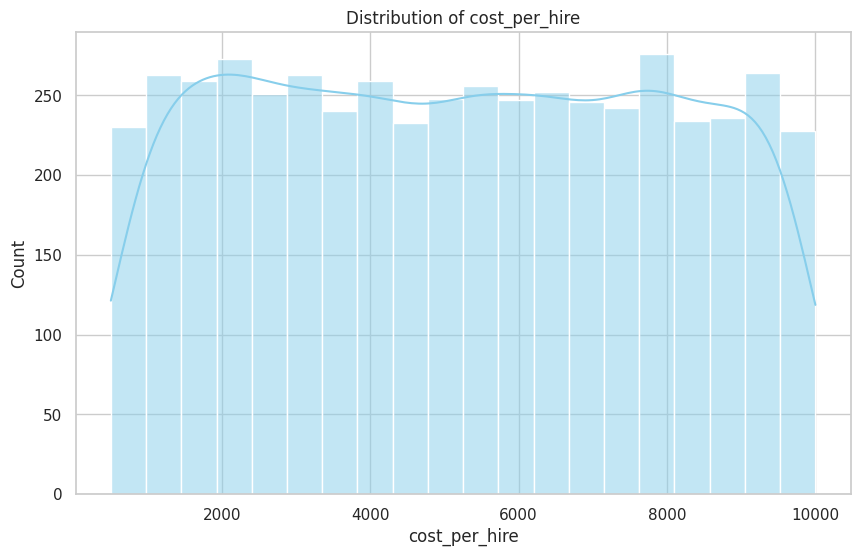

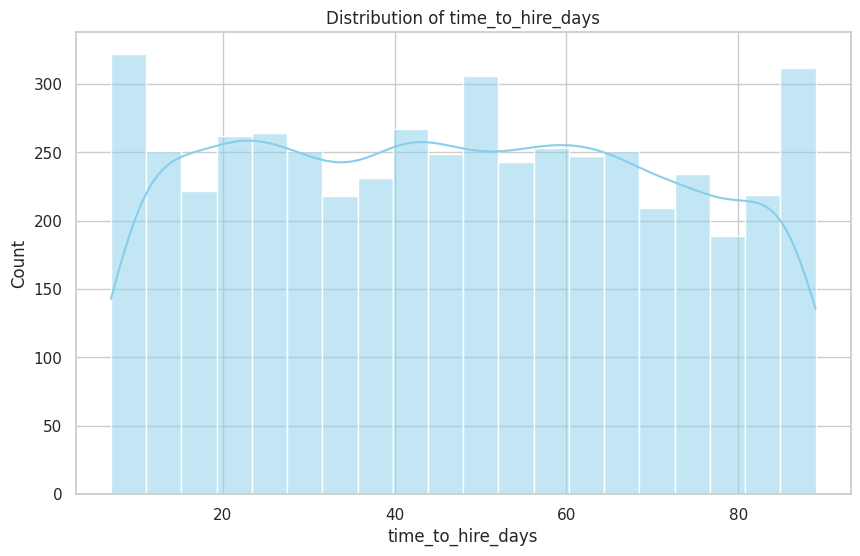

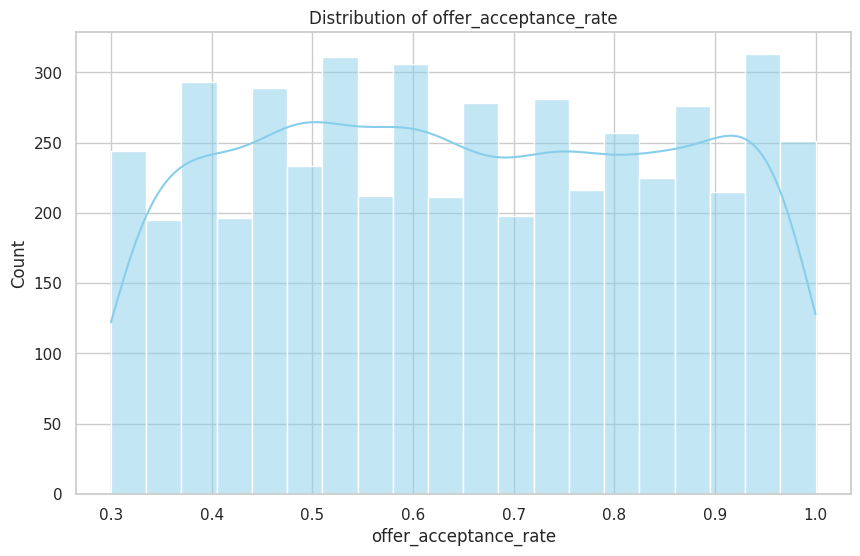

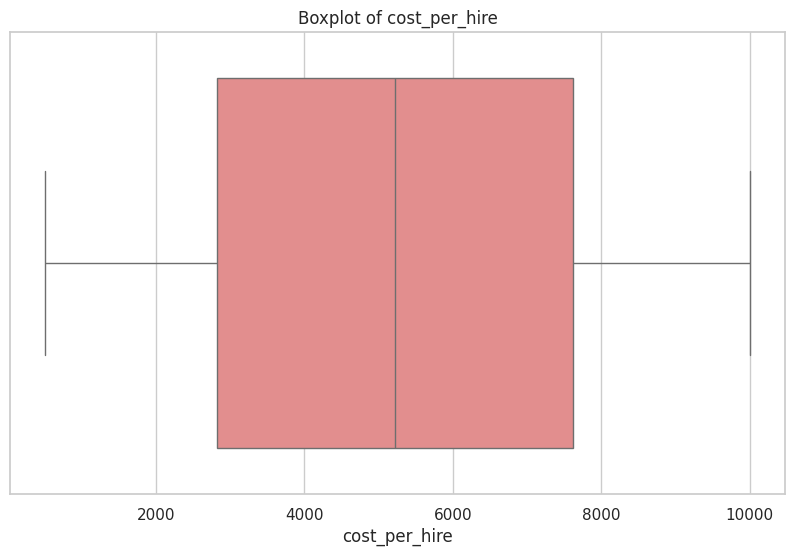

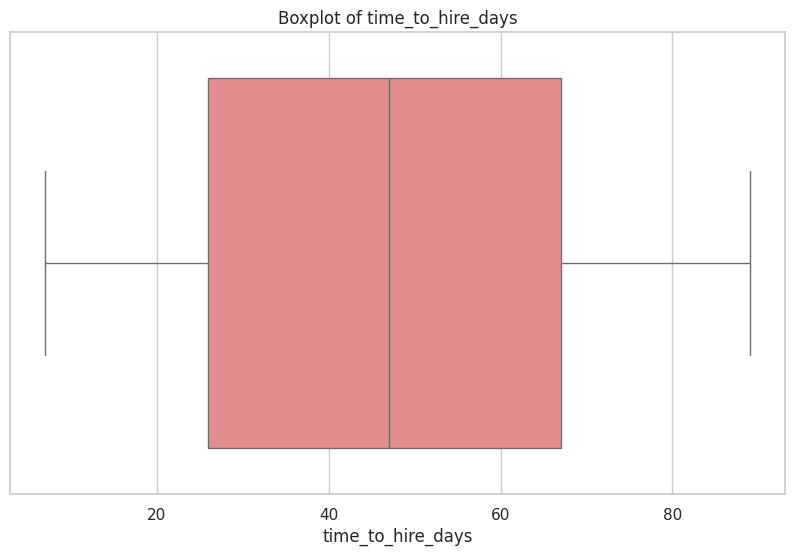

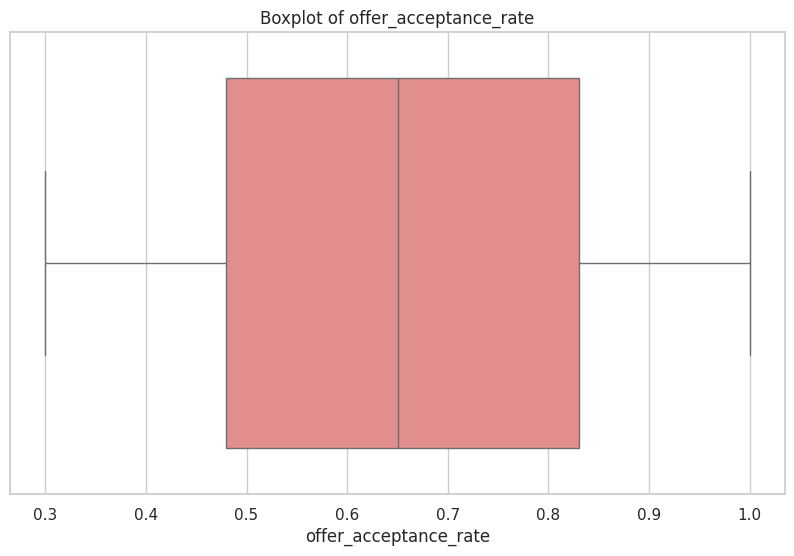

In [10]:
# distribusi variabel utama
num_cols = ["cost_per_hire", "time_to_hire_days", "offer_acceptance_rate"]

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=20, color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

# deteksi outlier
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col], color="lightcoral")
    plt.title(f"Boxplot of {col}")
    plt.show()

,department,cost_per_hire,time_to_hire_days,offer_acceptance_rate
0,Engineering,5265.559166,47.875467,0.655455
1,Finance,5184.943722,48.210464,0.651141
2,HR,5203.199208,45.780712,0.652698
3,Marketing,5359.963416,47.831073,0.662404
4,Product,5292.499813,46.262295,0.644918
5,Sales,4983.704659,47.309756,0.638720


/tmp/ipython-input-2237822257.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="department", y=col, data=dept_group, palette="viridis")


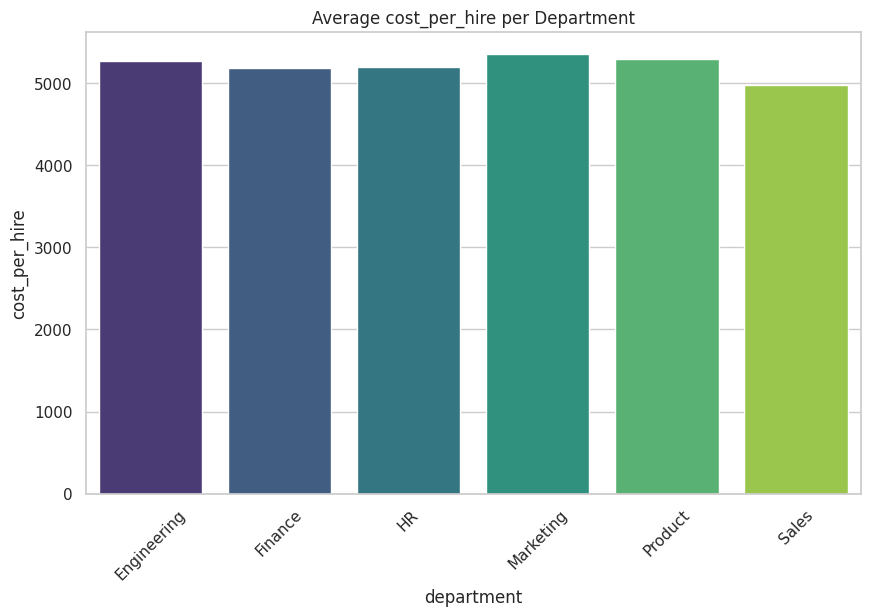

/tmp/ipython-input-2237822257.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="department", y=col, data=dept_group, palette="viridis")


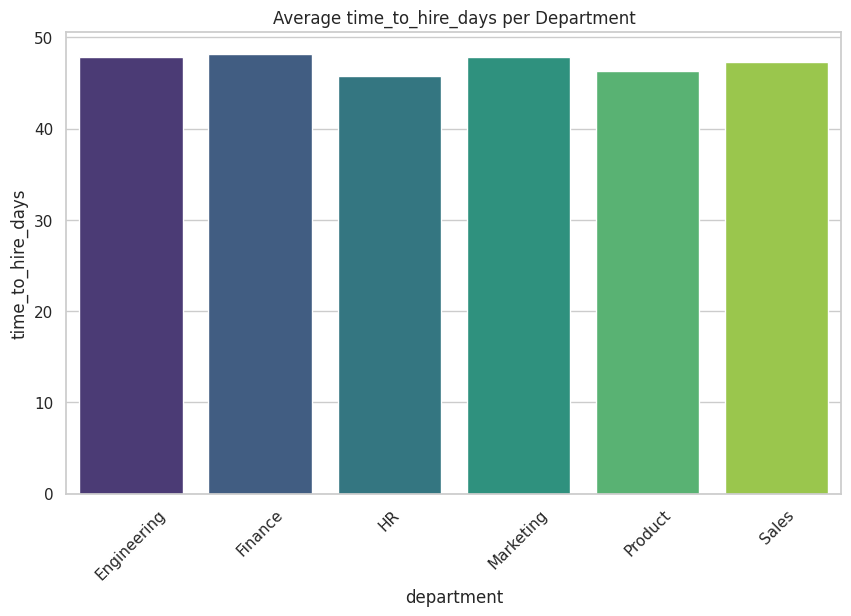

/tmp/ipython-input-2237822257.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="department", y=col, data=dept_group, palette="viridis")


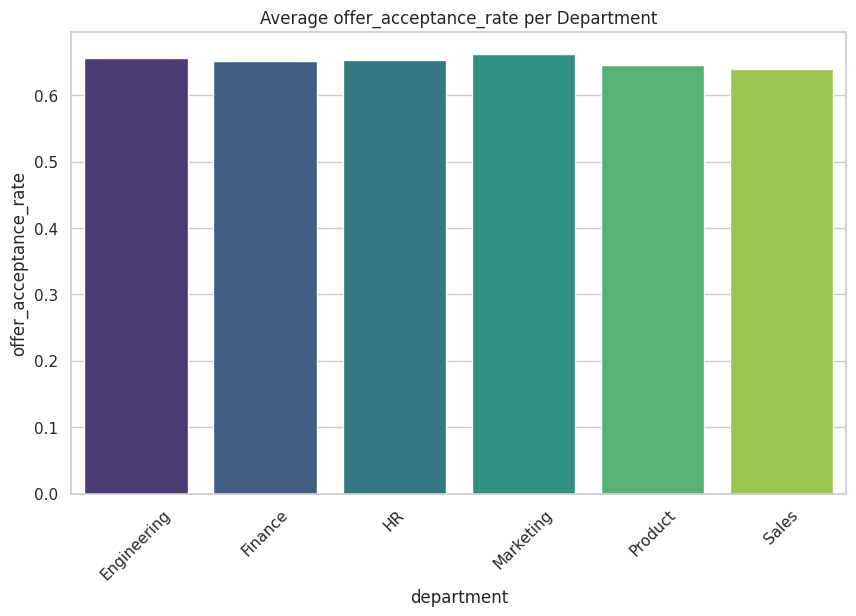

In [11]:
# analisis berdasarkan departemen
dept_group = df.groupby("department")[num_cols].mean().reset_index()
display(dept_group)

for col in num_cols:
    plt.figure()
    sns.barplot(x="department", y=col, data=dept_group, palette="viridis")
    plt.title(f"Average {col} per Department")
    plt.xticks(rotation=45)
    plt.show()

,source,cost_per_hire,time_to_hire_days,offer_acceptance_rate
0,Job Portal,5248.674301,46.512821,0.653482
1,LinkedIn,5148.312293,46.993803,0.645771
2,Recruiter,5303.152826,47.407043,0.658321
3,Referral,5165.647522,47.826427,0.646286


/tmp/ipython-input-1041546545.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="source", y=col, data=source_group, palette="mako")


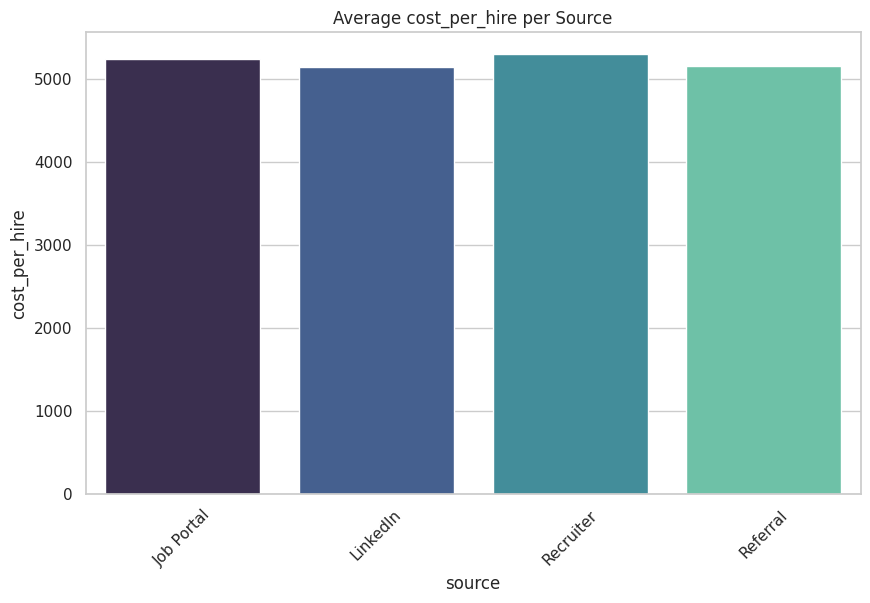

/tmp/ipython-input-1041546545.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="source", y=col, data=source_group, palette="mako")


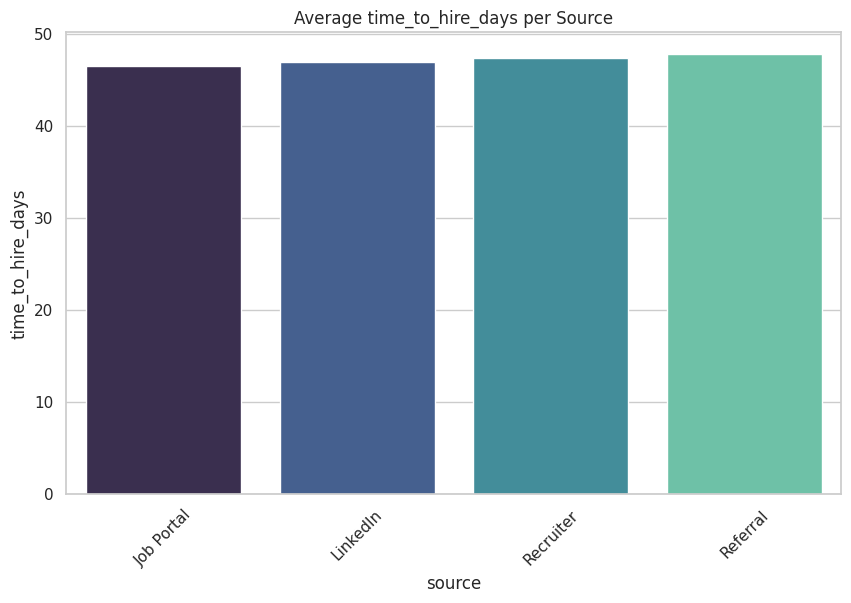

/tmp/ipython-input-1041546545.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="source", y=col, data=source_group, palette="mako")


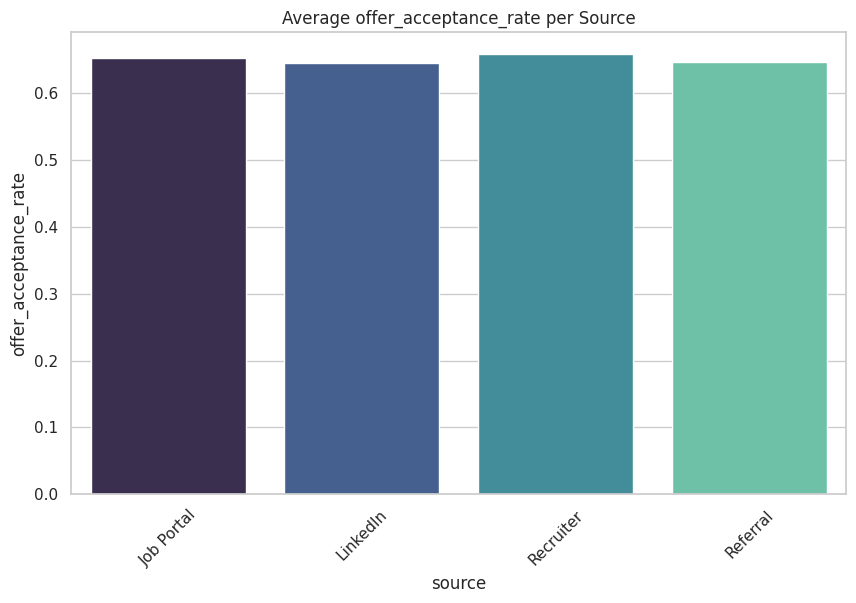

In [12]:
# analisis berdasarkan source
source_group = df.groupby("source")[num_cols].mean().reset_index()
display(source_group)

for col in num_cols:
    plt.figure()
    sns.barplot(x="source", y=col, data=source_group, palette="mako")
    plt.title(f"Average {col} per Source")
    plt.xticks(rotation=45)
    plt.show()

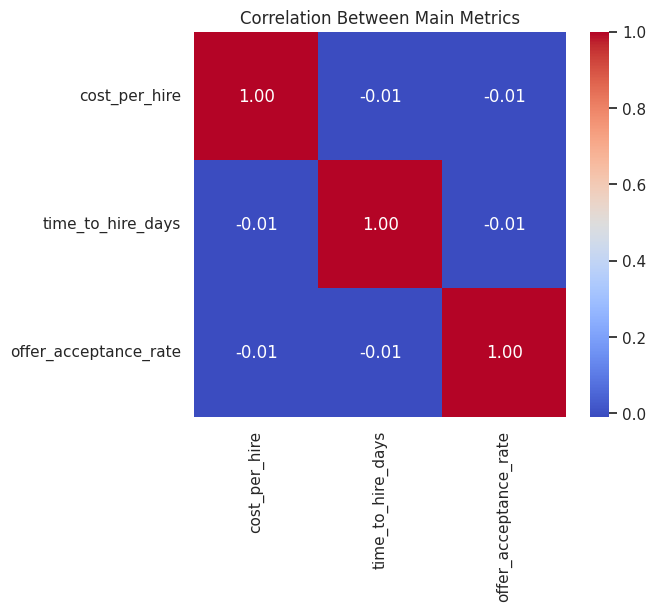

In [13]:

# korelasi antar variabel
corr = df[num_cols].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Main Metrics")
plt.show()

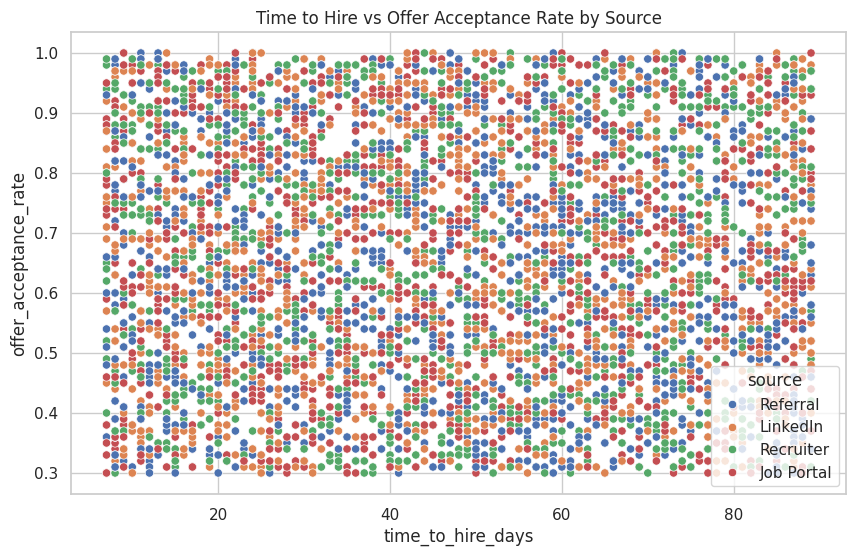

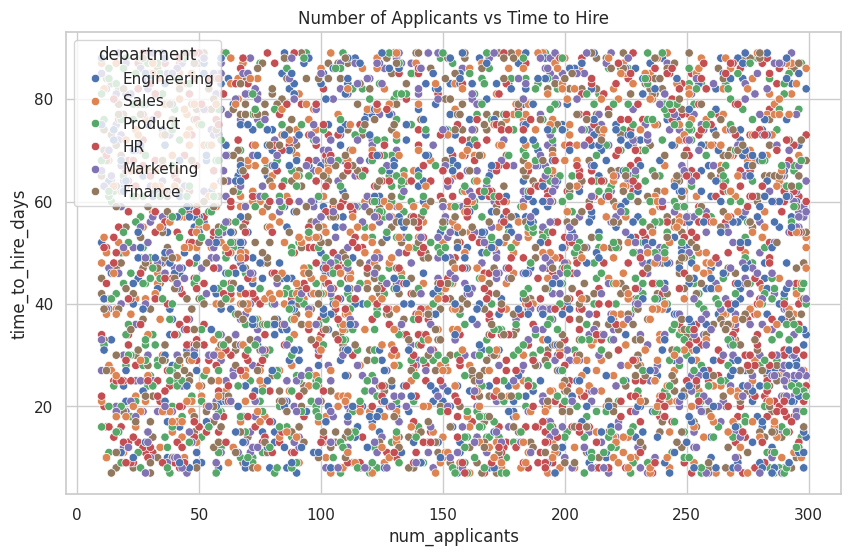

In [15]:
# hubungan antar variabel
# Scatter plot Time to Hire vs Offer Acceptance Rate
plt.figure()
sns.scatterplot(x="time_to_hire_days", y="offer_acceptance_rate", data=df, hue="source")
plt.title("Time to Hire vs Offer Acceptance Rate by Source")
plt.show()

# Scatter plot Applicants vs Time to Hire
if "num_applicants" in df.columns:
    plt.figure()
    sns.scatterplot(x="num_applicants", y="time_to_hire_days", data=df, hue="department")
    plt.title("Number of Applicants vs Time to Hire")
    plt.show()

In [16]:
# insight
print("\nTop 5 Departments by Cost per Hire:")
display(df.groupby("department")["cost_per_hire"].mean().sort_values(ascending=False).head())

print("\nTop 5 Sources by Offer Acceptance Rate:")
display(df.groupby("source")["offer_acceptance_rate"].mean().sort_values(ascending=False).head())



Top 5 Departments by Cost per Hire:


,cost_per_hire
department,
Marketing,5359.963416
Product,5292.499813
Engineering,5265.559166
HR,5203.199208
Finance,5184.943722



Top 5 Sources by Offer Acceptance Rate:


,offer_acceptance_rate
source,
Recruiter,0.658321
Job Portal,0.653482
Referral,0.646286
LinkedIn,0.645771
